In [1]:
import pandas as pd
import numpy as np

In [2]:
 good_reads = pd.read_csv('goodreads.tsv' , sep='\t') #names=['user_id','song_id','play_count'])

In [3]:
good_reads.head()

,title,date,rating,body
0,The Body: A Guide for Occupants,"Oct 11, 2019",5.0,Lovingly presented with humour and kindness an...
1,Resistance Reborn,"Feb 28, 2020",4.0,I read through this book quicker than anticip...
2,The Book of Two Ways,"Jul 13, 2020",4.0,Jodi Picoult does it again in this new novel. ...
3,How to Write One Song: Loving the Things We Cr...,"Feb 21, 2021",4.0,I’m a music freak without a shred of musical a...
4,The Giver of Stars,"Sep 08, 2020",4.0,The Giver of Stars by Jojo Moyes won the Book ...


In [5]:
good_reads.shape

(8433, 4)

In [14]:
#Shuffling The Data
from sklearn.utils import shuffle
df = shuffle(good_reads)

In [16]:
#Extracting just the 1* and 5***** reviews
df1 = df[(df.rating==1) | (df.rating==5)]

In [17]:
df1.shape

(3366, 4)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3366 entries, 1371 to 7529
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   3366 non-null   object 
 1   date    3365 non-null   object 
 2   rating  3366 non-null   float64
 3   body    3365 non-null   object 
dtypes: float64(1), object(3)
memory usage: 131.5+ KB


In [21]:
df1.describe(include='object')

,title,date,body
count,3366,3365,3365
unique,31,670,3361
top,A Rhythm of Prayer: A Collection of Meditation...,"Apr 07, 2021",5 stars“She just wasn’t sure she had yet been ...
freq,230,18,2


In [22]:
#We have reviews of 31 books with A Rhythm of Prayer: A Collection of Meditation...	 as most frequent book
#We can also observe 4 duplicated reviews

In [23]:
df1.isnull().sum()

title     0
date      1
rating    0
body      1
dtype: int64

In [ ]:
#We an observe a missing value one each of date and body we can remove them

In [35]:
#Lets see no.of ratings given to each of book
df1.groupby('title')['rating'].count()

title
A Burning                                                                        93
A Rhythm of Prayer: A Collection of Meditations for Renewal                     230
A Song for You: My Life with Whitney Houston                                    129
All Adults Here                                                                  64
An Unexpected Peril                                                              97
And They Called It Camelot: A Novel of Jacqueline Bouvier Kennedy Onassis        80
Aurora Burning                                                                  168
Desolation Road                                                                 108
Early Morning Riser                                                             119
Explorer's Guide to Wildemount                                                   17
Finding Ashley                                                                  117
Hood Feminism: Notes from the Women That a Movement Forgot            

In [36]:
#Lets see average rating given to each book
df1.groupby('title')['rating'].mean()

title
A Burning                                                                       4.053763
A Rhythm of Prayer: A Collection of Meditations for Renewal                     4.565217
A Song for You: My Life with Whitney Houston                                    4.875969
All Adults Here                                                                 4.375000
An Unexpected Peril                                                             4.917526
And They Called It Camelot: A Novel of Jacqueline Bouvier Kennedy Onassis       4.850000
Aurora Burning                                                                  4.976190
Desolation Road                                                                 4.037037
Early Morning Riser                                                             4.596639
Explorer's Guide to Wildemount                                                  5.000000
Finding Ashley                                                                  4.897436
Hood Feminism: 

In [37]:
import matplotlib.pyplot as plt

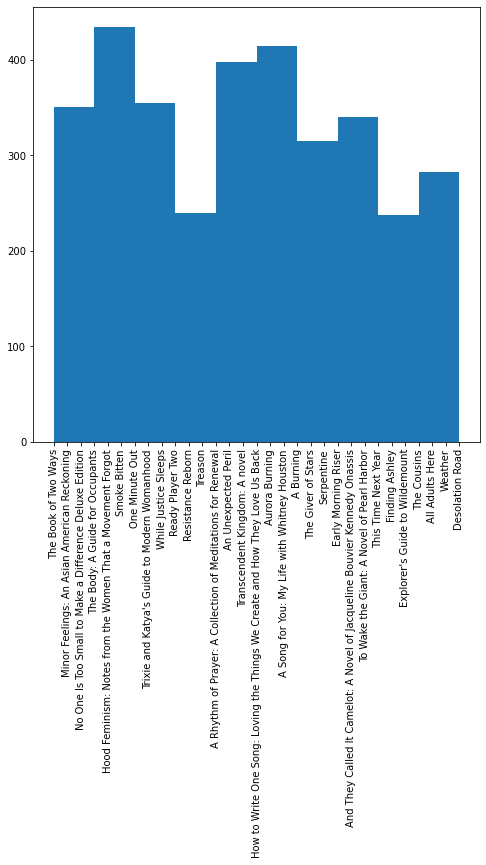

In [44]:
plt.figure(figsize=(8,8))
plt.hist(df1['title'])
plt.xticks(rotation = 90)
plt.show();

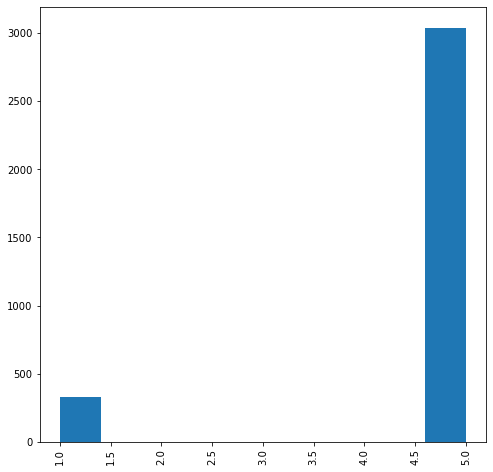

In [47]:
#Histogram of Rating
plt.figure(figsize=(8,8))
plt.hist(df1['rating'])
plt.xticks(rotation = 90)
plt.show();

In [ ]:
#Can Observe a imbalance

In [49]:
import seaborn as sns

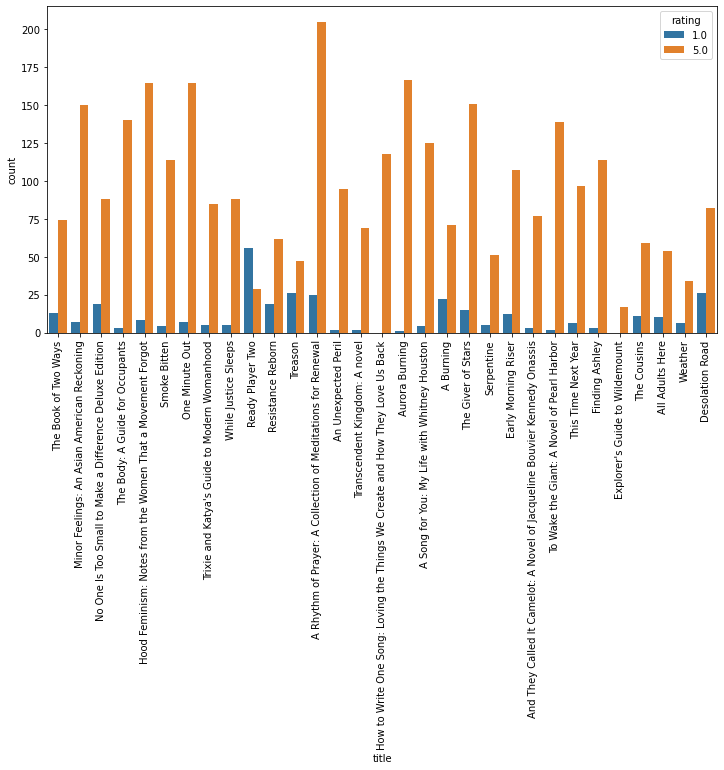

In [56]:
#Rating per each book
plt.figure(figsize=(12,6))
sns.countplot(x ='title',hue='rating' ,data = df1)
plt.xticks(rotation = 90)
plt.show();